In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, info_plots

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
X_test = test_data.drop("ID_code", axis = 1)

In [ ]:
quantile = QuantileTransformer(output_distribution="normal")

In [ ]:
x = quantile.fit_transform(X)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 1)

In [ ]:
x_train.shape

(150000, 200)

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
gaussian_clf = GaussianNB().fit(x_train,y_train)

In [ ]:
preds = gaussian_clf.predict(x_val)

In [ ]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     45057
           1       0.71      0.36      0.48      4943

    accuracy                           0.92     50000
   macro avg       0.82      0.67      0.72     50000
weighted avg       0.91      0.92      0.91     50000



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
lr_auc = roc_auc_score(y_val,preds)

In [ ]:
lr_auc

0.6714126927076086

In [ ]:
train_preds = gaussian_clf.predict(x_train)

In [ ]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    134845
           1       0.72      0.37      0.49     15155

    accuracy                           0.92    150000
   macro avg       0.83      0.68      0.72    150000
weighted avg       0.91      0.92      0.91    150000



In [ ]:
lr_auc = roc_auc_score(y_train, train_preds)

In [ ]:
lr_auc

0.6757325819511065

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 1)

In [ ]:


from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)




Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [ ]:
train_auc = roc_auc_score(y_train,pipeline.predict_proba(X_train)[:,1])

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,pipeline.predict_proba(X_train)[:,1])

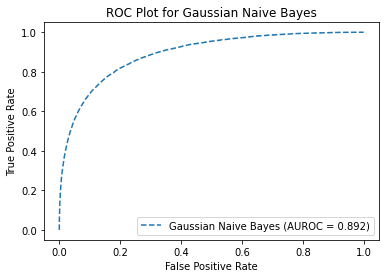

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Gaussian Naive Bayes (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
val_score = roc_auc_score(y_val,pipeline.predict_proba(X_val)[:,1])

In [ ]:
hh = pipeline.predict_proba(X_val)[:,1]

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,hh)

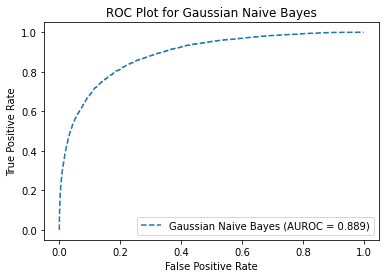

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Gaussian Naive Bayes (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()